# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

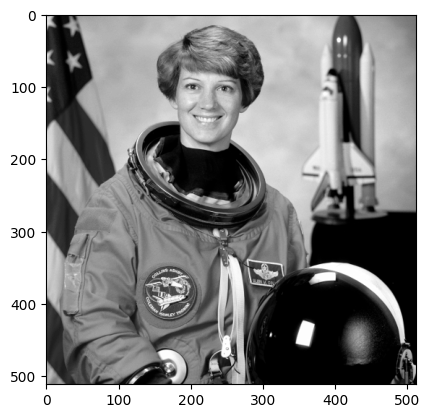

In [5]:
img = plt.imread("data/astronaut.png")
plt.figure()
plt.imshow(img, "gray")


**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [8]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)          #Komplett schwarzes Bild voller Nullen (speichen da später unsere Ergebnisse, damit das Original nicht verändert wird)
    n = (size - 1) // 2                         #Abstand vom Zentrum des Filters bis zum Rand
    h, w = img_in.shape 
    for p in numpy.ndindex(img_in.shape):       #Besucht jeden Pixel des Bildes nacheinander mit p(Reihe, Spalte)
        row, col = p
        if n <= row < h - n and n <= col < w - n:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):  #schauen uns mit q alle Nachbarpixel in der kleinen Box an
                neighbor_row = row + q[0] - n
                neighbor_col = col + q[1] - n
                neighborhood_sum += img_in[neighbor_row, neighbor_col]
            result[p] = neighborhood_sum / (size * size)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

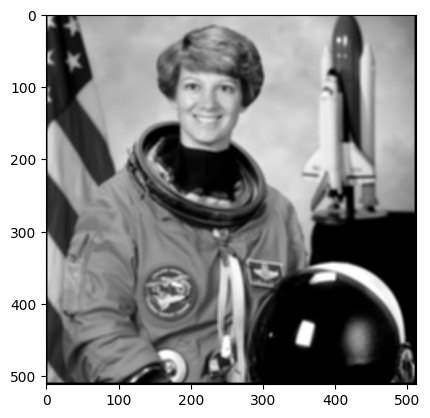

In [38]:
imgfiltered = meanfilter(img, 5)

plt.imshow(imgfiltered, "gray")

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [23]:
imgcompare = meanfilter(img, 5)
print(imgcompare.shape)
imgcorrect = plt.imread("data/astronaut_meanfilter5.png")
print(imgcorrect.shape)
assert numpy.allclose(imgcompare, imgcorrect, atol=1/255)   #Nothing happens if there aren't any errors.
print("Test bestanden")


(512, 512)
(512, 512)
Test bestanden


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [29]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)          #Komplett schwarzes Bild voller Nullen (speichen da später unsere Ergebnisse, damit das Original nicht verändert wird)
    n = (size - 1) // 2                         #Abstand vom Zentrum des Filters bis zum Rand
    h, w = img_in.shape 
    for p in numpy.ndindex(img_in.shape):       #Besucht jeden Pixel des Bildes nacheinander mit p(Reihe, Spalte)
        row, col = p
        if n <= row < h - n and n <= col < w - n:
            neighborhood_values = []           #Leere Liste erstellen, in der wir dann die values sammeln können
            for q in numpy.ndindex(size, size): #schauen uns mit q alle Nachbarpixel in der kleinen Box an
                neighbor_row = row + q[0] - n
                neighbor_col = col + q[1] - n
                neighborhood_values.append(img_in[neighbor_row, neighbor_col])  #Wert in die Liste hinzufügen
            neighborhood_values.sort()
            mid_index = (size * size) // 2
            result[p] = neighborhood_values[mid_index]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

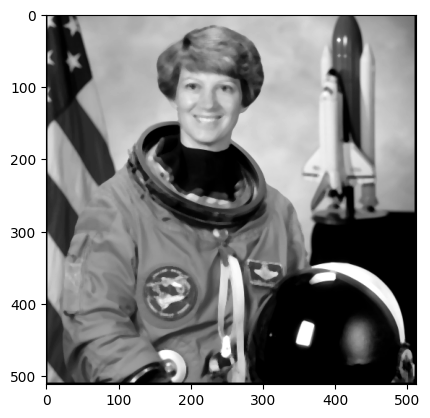

In [30]:
medianimage = medianfilter(img, 5)

plt.imshow(medianimage, "gray")

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [31]:
mediancorrect = plt.imread("data/astronaut_medianfilter5.png")
assert numpy.allclose(medianimage, mediancorrect, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [32]:
import scipy.ndimage

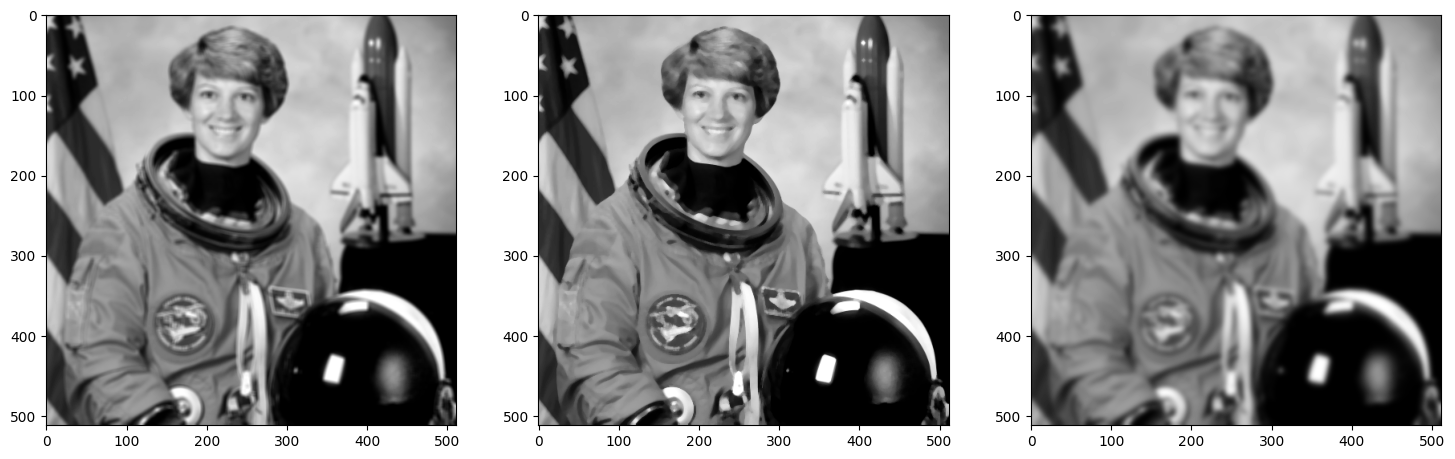

In [37]:
sunif = scipy.ndimage.uniform_filter(img, 5)
smedian = scipy.ndimage.median_filter(img, 5)
sgauss = scipy.ndimage.gaussian_filter(img, 3)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(sunif, "gray")

plt.subplot(1, 3, 2)
plt.imshow(smedian, "gray")

plt.subplot(1, 3, 3)
plt.imshow(sgauss, "gray")


**Beobachtungen:**

Meine Implementierungen erzeugen Bild mit schwarzem Rand, dessen Breite n entspricht. 

Die Funktionen von scipy.ndimage berechnen das Bild bis zum äußersten Rand, sodass kein schwarzer Rahmen entsteht.

Funktionen aus der scipy-Bibliothek arbeiten wesentlich schneller als meine manuellen Implementierungen.

**Erklärung:** 

Border entstehen weil wir das "Border-Problem" so gelöst haben, dass wir Berechnungen einfach übersprungen haben, wenn die Filter-Nachbarschaft teilweise außerhalb des Bildes lag. Da das result-Array mit Nullen (schwarz) initialisiert wurde, bleiben diese Randpixel schwarz.

Professionelle Bibliotheken wie scipy nutzen fortgeschrittene Techniken wie Auffüllen des Randes durch Spiegelung oder Wiederholung der Randpixel, um auch an den Ecken einen gültigen Mittelwert oder Median berechnen zu können.

Die scipy-Funktionen sind in hochoptimiertem C-Code geschrieben, während meine Implementierung verschachtelte Python-Schleifen nutzt, was bei großen Bildern sehr rechenintensiv ist.

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [40]:
imgmean = scipy.ndimage.uniform_filter(img, 5)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

In [41]:
imgmedian = scipy.ndimage.median_filter(img, 5)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

In [42]:
imggaussian = scipy.ndimage.gaussian_filter(img, 5)

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [43]:
def fastfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    h, w = img_in.shape
    for p in numpy.ndindex(img_in.shape):
        row, col = p
        if n <= row < h - n and n <= col < w - n:
            neighborhood = img_in[row - n: row + n + 1, col - n : col + n + 1]
            result[p] = neighborhood.mean()
    return result
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

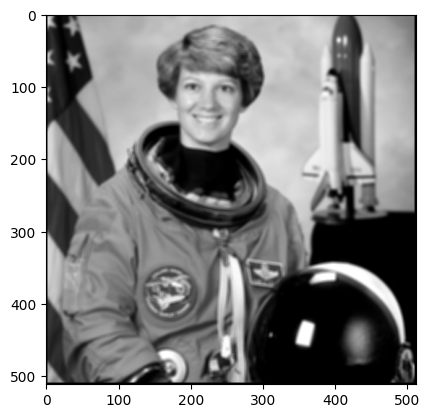

In [45]:
fastimage = fastfilter(img, 5)

plt.imshow(fastimage, "gray")

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [46]:
slowimage = meanfilter(img, 5)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [48]:
%timeit fastfilter(img, 5)

%timeit meanfilter(img, 5)

2.12 s ± 31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.58 s ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

Die Funktion fastfilter ist deutlich schneller als die ursprüngliche Version meanfilter. Während der erste Filter bei großen Bildern oft mehrere Sekunden benötigt, erledigt die "Fast"-Variante dieselbe Aufgabe meist in einem Bruchteil dieser Zeit (ms-Bereich).

In der ersten Version haben wir zwei verschachtelte for-Loops verwendet: einen für die Bildpixel und einen weiteren für die Pixel innerhalb der Nachbarschaft. Jede einzelne Iteration einer Schleife verursacht einen gewissen Rechenaufwand im Interpreter. 

Die fastfilter-Version reduziert den Code auf eine einzige for-Schleife. Das Sammeln der Nachbarschaftswerte – wird durch Slicing ersetzt. 

Wenn wir Slicing und Methoden wie .mean() auf ein numpy.ndarray anwenden, führt NumPy diese Operationen in hochoptimiertem, kompiliertem C-Code aus. Die Berechnungen für alle Pixel in der Nachbarschaft finden also fast gleichzeitig auf der Maschinenebene statt, anstatt jeden Wert einzeln mühsam in Python zu verarbeiten.